## Happiness and Corruption 2015-2020

В своем проекте я намерен исследовать зависимость индекса счастья от различных факторов, таких как уровень ВВП на душу населения, индекс коррупции и т.д., а также сравнить средний индекс счастья за 2015 и 2020 годы.
Данные были взяты отсюда: https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

**Исследовательские вопросы**: 
* Присутствует ли взаимосвязь между между уровнем счастья населения и коррумпированностью в стране? 
* Присутствует ли взаимосвязь между между уровнем счастья населения и уровнем ВВП на душу населения в стране?
* Стали ли люди в 2020 году более счастливыми по сравнению с 2015 годом?

**Гипотеза1**: уровень счастья выше в тех странах, в которых более низкий уровень коррупции.

Такую гипотезу можно выдвинуть, основываясь на том, что в странах с высоким уровнем коррупции политические и социальные институты будут работать менее эффективно, что будет сказываться на уровне счастья населения.

**Гипотеза2**: уровень счастья выше в тех странах, в которых больше ВВП на душу населения.

Такую гипотезу можно выдвинуть, основываясь на понимании того, что чем выше экономическое благосостояние граждане, тем они будут счастливие.

**Гипотеза3**: индекс счастья в 2015 году в среднем выше, чем в 2020 году.

Мне кажется, что это так, потому что пандемия коронавирусной инфекции, которая имела место в 2020 году, негативно сказалась на счастье населения.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')

In [3]:
df

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


* `Country` - название страны

* `happiness_score` - индекс счастья (чем больше, тем граждане страны счастливие).

* `gdp_per_capita` - cтепень, в которой ВВП на душу населения способствует расчету показателя счастья.

* `family` - степень, в которой семья способствует расчету показателя счастья.

* `health` - степень, в которой продолжительность жизни способствует расчету показателя счастья.

* `freedom` - cтепень, в которой свобода (восприятие свободы) способствовала расчету показателя счастья.

* `generosity` - числовое значение, рассчитанное на основе представлений участников опроса о щедрости в их стране.

* `government_trust` - степень, в которой восприятие коррупции влияет на показатель счастья.

* `dystopia_residual` - оценка основана на гипотетическом сравнении с самой грустной страной в мире.

* `continent` - континент, на котором находится страна.

* `Year` - год (2015-2020).

* `social_support` - Социальная поддержка — это восприятие и реальность того, что о человеке заботятся, что он может получить помощь от других людей, и, что наиболее популярно, что он является частью поддерживающей социальной сети.

* `cpi_score` - индекс восприятия коррупции (чем больше, тем в стране меньше коррупции).



Все показатели, кроме названия страны (Country) и континента (continent), имеют целочисленный тип данных или тип с плавающей точкой.

In [528]:
df[df.isna() == True].sum()

Country                0
happiness_score      0.0
gdp_per_capita       0.0
family               0.0
health               0.0
freedom              0.0
generosity           0.0
government_trust     0.0
dystopia_residual    0.0
continent              0
Year                 0.0
social_support       0.0
cpi_score            0.0
dtype: object

In [529]:
df[df['family'] == 0].shape[0]

397

In [530]:
df[df['social_support'] == 0].shape[0]

396

In [531]:
df[df['dystopia_residual'] == 0].shape[0]

264

Как можно заметить, в датафрейме нет пропущенных значений, на самом деле они есть, просто они закодированы нулем. Я удалю столбец government_trust, потому что его значения могут быть получены из cpi_score, при этом при построении регрессии лучше опираться именно на чистый индекс, а не на степень. Также я удалю столбцы family, social_support и dystopia_residual, потому что в них слишком много пропущенных значений (нулей).

In [532]:
del df['family']

In [533]:
del df['social_support']

In [534]:
del df['government_trust']

In [535]:
del df['dystopia_residual']

In [536]:
df

,Country,happiness_score,gdp_per_capita,health,freedom,generosity,continent,Year,cpi_score
0,Norway,7.5370,1.616463,0.796667,0.635423,0.362012,Europe,2015,88
1,Denmark,7.5220,1.482383,0.792566,0.626007,0.355280,Europe,2015,91
2,Iceland,7.5040,1.480633,0.833552,0.627163,0.475540,Europe,2015,79
3,Switzerland,7.4940,1.564980,0.858131,0.620071,0.290549,Europe,2015,86
4,Finland,7.4690,1.443572,0.809158,0.617951,0.245483,Europe,2015,90
...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.494102,0.509089,0.033407,Africa,2020,60
788,Tanzania,3.4762,0.457163,0.442678,0.509343,0.271541,Africa,2020,38
789,Rwanda,3.3123,0.343243,0.572383,0.604088,0.235705,Africa,2020,54
790,Zimbabwe,3.2992,0.425564,0.375038,0.377405,0.151349,Africa,2020,24


Также я удалю значения, где gdp_per_capita = 0, такое значение только одно.

In [537]:
df = df.query("gdp_per_capita != 0")

In [538]:
df.describe(include = 'object')

,Country,continent
count,791,791
unique,132,6
top,Norway,Europe
freq,6,228


У нас в датафрейме есть 132 уникальных страны, разбросанных по шести континентам.

In [539]:
df['happiness_score'].describe()

count    791.000000
mean       5.475457
std        1.123813
min        2.566900
25%        4.600000
50%        5.488000
75%        6.301000
max        7.808700
Name: happiness_score, dtype: float64

Главная для нас переменная в нашем анализе - это happiness_score - индекс счастья в различных странах. Ее далее мы будем использовать в качестве зависимой переменной  при построении линейной регрессии. Минимальное значение happiness_score = 2.5669, а максимальное = 7.8087. При этом среднее значение равно 5.475457, а медианное 5.488, как видно, среднее и медианное значения по этой переменной довольно близки друг к другу, что говорит нам о том, что распределение значений практически не скошено. Нижний квартиль равен 4.6, то есть 25% значений находятся ниже этого значения, а 75% выше этого значения. При этом верхний квартиль равен 6.301, что означает, что 75% значений меньше этого значения, а 25% значений больше этого значения.

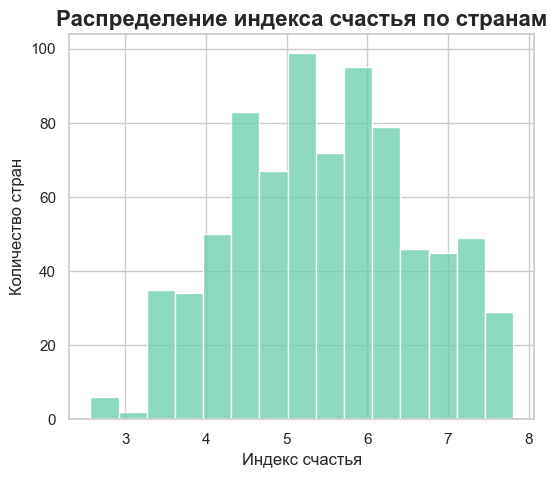

In [540]:
fig, ax = plt.subplots(figsize=(6,5))
sns.histplot(df['happiness_score'], color = '#66CDAA')
ax.set_xlabel("Индекс счастья")
ax.set_ylabel("Количество стран")
ax.set_title("Распределение индекса счастья по странам", fontsize = 16, fontweight = 'bold');

Теперь построим 95% доверительный интервал для среднего значения индекса счастья.

In [541]:
st.t.interval(alpha=0.95,
              df=len(df)-1,
              loc=np.mean(df['happiness_score']), 
              scale=st.sem(df['happiness_score']))

C:\Users\aksen\AppData\Local\Temp\ipykernel_18080\2826078317.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95,


(5.397019719841608, 5.553893298014271)

Можно сказать, что в 95% случаев истинное среднее значения индекса счастья будет находится в пределах полученного доверительного интервала.

In [542]:
df[df['happiness_score'] == df['happiness_score'].max()]

,Country,happiness_score,gdp_per_capita,health,freedom,generosity,continent,Year,cpi_score
660,Finland,7.8087,1.28519,0.961271,0.662317,0.15967,Europe,2020,85


Максимальное значение индекса счастья соответствует Финляндии за 2020 год.

In [543]:
df[df['happiness_score'] == df['happiness_score'].min()]

,Country,happiness_score,gdp_per_capita,health,freedom,generosity,continent,Year,cpi_score
791,Afghanistan,2.5669,0.300706,0.266052,0.0,0.135235,Asia,2020,19


Минимальное значение индекса счастья соответсвует Афганистану за 2020 год. Из этого можно сделать вывод, что значения happiness_score за 2020 год имеют самый большой размах.

In [544]:
df['cpi_score'].describe()

count    791.000000
mean      44.359039
std       19.500342
min       11.000000
25%       30.000000
50%       38.000000
75%       57.000000
max       91.000000
Name: cpi_score, dtype: float64

Первой независимой переменной будет cpi_score - индекс коррупции. Его среднее значение равно 44.359039. Минимальное равно 11, а максимальное 91. Медианное значение равно 38, то есть 50% стран имеют уровень коррупции выше, а 50% стран ниже 38. Можно заметить, что медианное значение меньше среднего, а значит распределение индекса коррупции будет скошено вправо.

Теперь можно построить 95% доверительный интервал для среднего значения индекса восприятия коррупции в нашем датафрейме. Напомню, что среднее по выборке у нас равно 44.359039.

In [545]:
st.t.interval(alpha=0.95,
              df=len(df)-1,
              loc=np.mean(df['cpi_score']), 
              scale=st.sem(df['cpi_score']))

C:\Users\aksen\AppData\Local\Temp\ipykernel_18080\3145444164.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95,


(42.998008393295855, 45.72006998849934)

Можно сказать, что в 95% случаев истинное среднее значения индекса восприятия коррупции будет находится в пределах полученного доверительного интервала.

In [546]:
df[df['cpi_score'] == df['cpi_score'].max()]

,Country,happiness_score,gdp_per_capita,health,freedom,generosity,continent,Year,cpi_score
1,Denmark,7.522,1.482383,0.792566,0.626007,0.355280,Europe,2015,91
7,New Zealand,7.314,1.405706,0.816760,0.614062,0.500005,Australia,2015,91


Наибольший индекс восприятия коррупции соответствует Дании и Новой Зеландии в 2015 году.

In [547]:
df[df['cpi_score'] == df['cpi_score'].min()]

,Country,happiness_score,gdp_per_capita,health,freedom,generosity,continent,Year,cpi_score
120,Afghanistan,3.794,0.401477,0.180747,0.10618,0.311871,Asia,2015,11


Наименьший индекс восприятия коррупции соответствует Афганистану за 2015 год. Из этого можно сделать вывод, что значения cpi_score в 2015 году имеют самый большой размах.

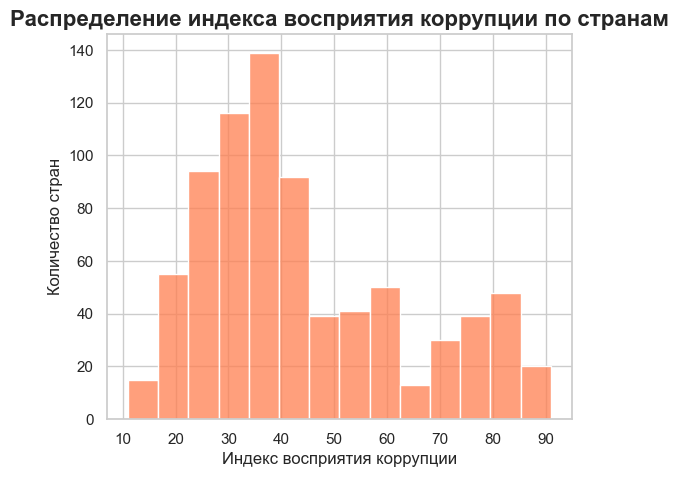

In [548]:
fig, ax = plt.subplots(figsize=(6,5))
sns.histplot(df['cpi_score'], color = '#FF7F50')
ax.set_xlabel("Индекс восприятия коррупции")
ax.set_ylabel("Количество стран")
ax.set_title("Распределение индекса восприятия коррупции по странам", fontsize = 16, fontweight = 'bold');

## Ответ на третий исследовательский вопрос и рассмотрение третьей гипотезы

Начнем с конца, тут я не буду строить регрессию, а отвечу на вопрос о том, стали ли люди счастливие в 2020 году по сравнению с 2015 годом посредством проверки гипотезы о равенстве средних в индексе счастья за 2015 год и индексе счастья за 2020 год.

In [549]:
df2015 = df[df['Year'] == 2015] # Отберем значения только за 2015 год
df2015

,Country,happiness_score,gdp_per_capita,health,freedom,generosity,continent,Year,cpi_score
0,Norway,7.537,1.616463,0.796667,0.635423,0.362012,Europe,2015,88
1,Denmark,7.522,1.482383,0.792566,0.626007,0.355280,Europe,2015,91
2,Iceland,7.504,1.480633,0.833552,0.627163,0.475540,Europe,2015,79
3,Switzerland,7.494,1.564980,0.858131,0.620071,0.290549,Europe,2015,86
4,Finland,7.469,1.443572,0.809158,0.617951,0.245483,Europe,2015,90
...,...,...,...,...,...,...,...,...,...
127,Guinea,3.507,0.244550,0.194129,0.348588,0.264815,South America,2015,25
128,Togo,3.495,0.305445,0.247106,0.380426,0.196896,Africa,2015,32
129,Rwanda,3.471,0.368746,0.326425,0.581844,0.252756,Africa,2015,54
130,Tanzania,3.349,0.511136,0.364509,0.390018,0.354256,Africa,2015,30


In [550]:
df2020 = df[df['Year'] == 2020] # В другой датафрейм сохраним значения только за 2020 год
df2020

,Country,happiness_score,gdp_per_capita,health,freedom,generosity,continent,Year,cpi_score
660,Finland,7.8087,1.285190,0.961271,0.662317,0.159670,Europe,2020,85
661,Denmark,7.6456,1.326949,0.979333,0.665040,0.242793,Europe,2020,88
662,Switzerland,7.5599,1.390774,1.040533,0.628954,0.269056,Europe,2020,85
663,Iceland,7.5045,1.326502,1.000843,0.661981,0.362330,Europe,2020,75
664,Norway,7.4880,1.424207,1.008072,0.670201,0.287985,Europe,2020,84
...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.494102,0.509089,0.033407,Africa,2020,60
788,Tanzania,3.4762,0.457163,0.442678,0.509343,0.271541,Africa,2020,38
789,Rwanda,3.3123,0.343243,0.572383,0.604088,0.235705,Africa,2020,54
790,Zimbabwe,3.2992,0.425564,0.375038,0.377405,0.151349,Africa,2020,24


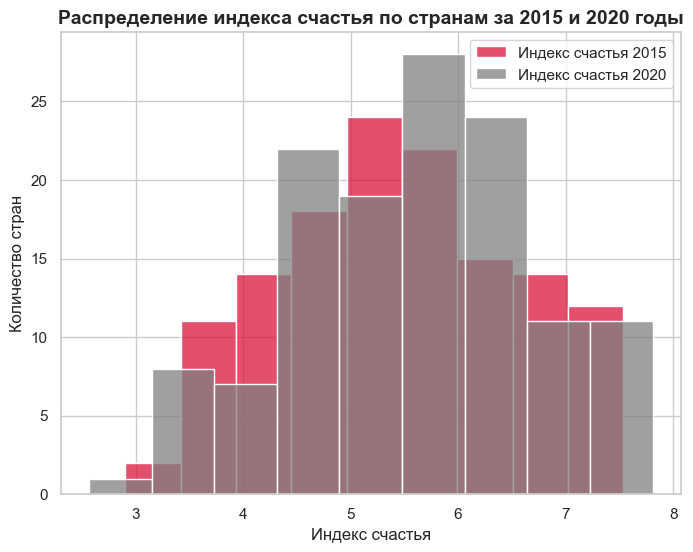

In [552]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df2015['happiness_score'], color = '#DC143C')
sns.histplot(df2020['happiness_score'], color = 'grey')
ax.set_xlabel("Индекс счастья")
ax.set_ylabel("Количество стран")
ax.set_title("Распределение индекса счастья по странам за 2015 и 2020 годы", fontsize = 14, fontweight = 'bold')
ax.legend(['Индекс счастья 2015', "Индекс счастья 2020"], loc=0);

Можно заметить, что максимальное значение индекса счастья за 2020 год больше, чем за 2015 год, а минимальное - меньше. То есть значения индекса счастья за 2020 год имеют больший размах, чем значения за 2015 год.

Теперь визуалилизуем распределение значений индекса счастья для всех стран за 2015 и 2020 годы.

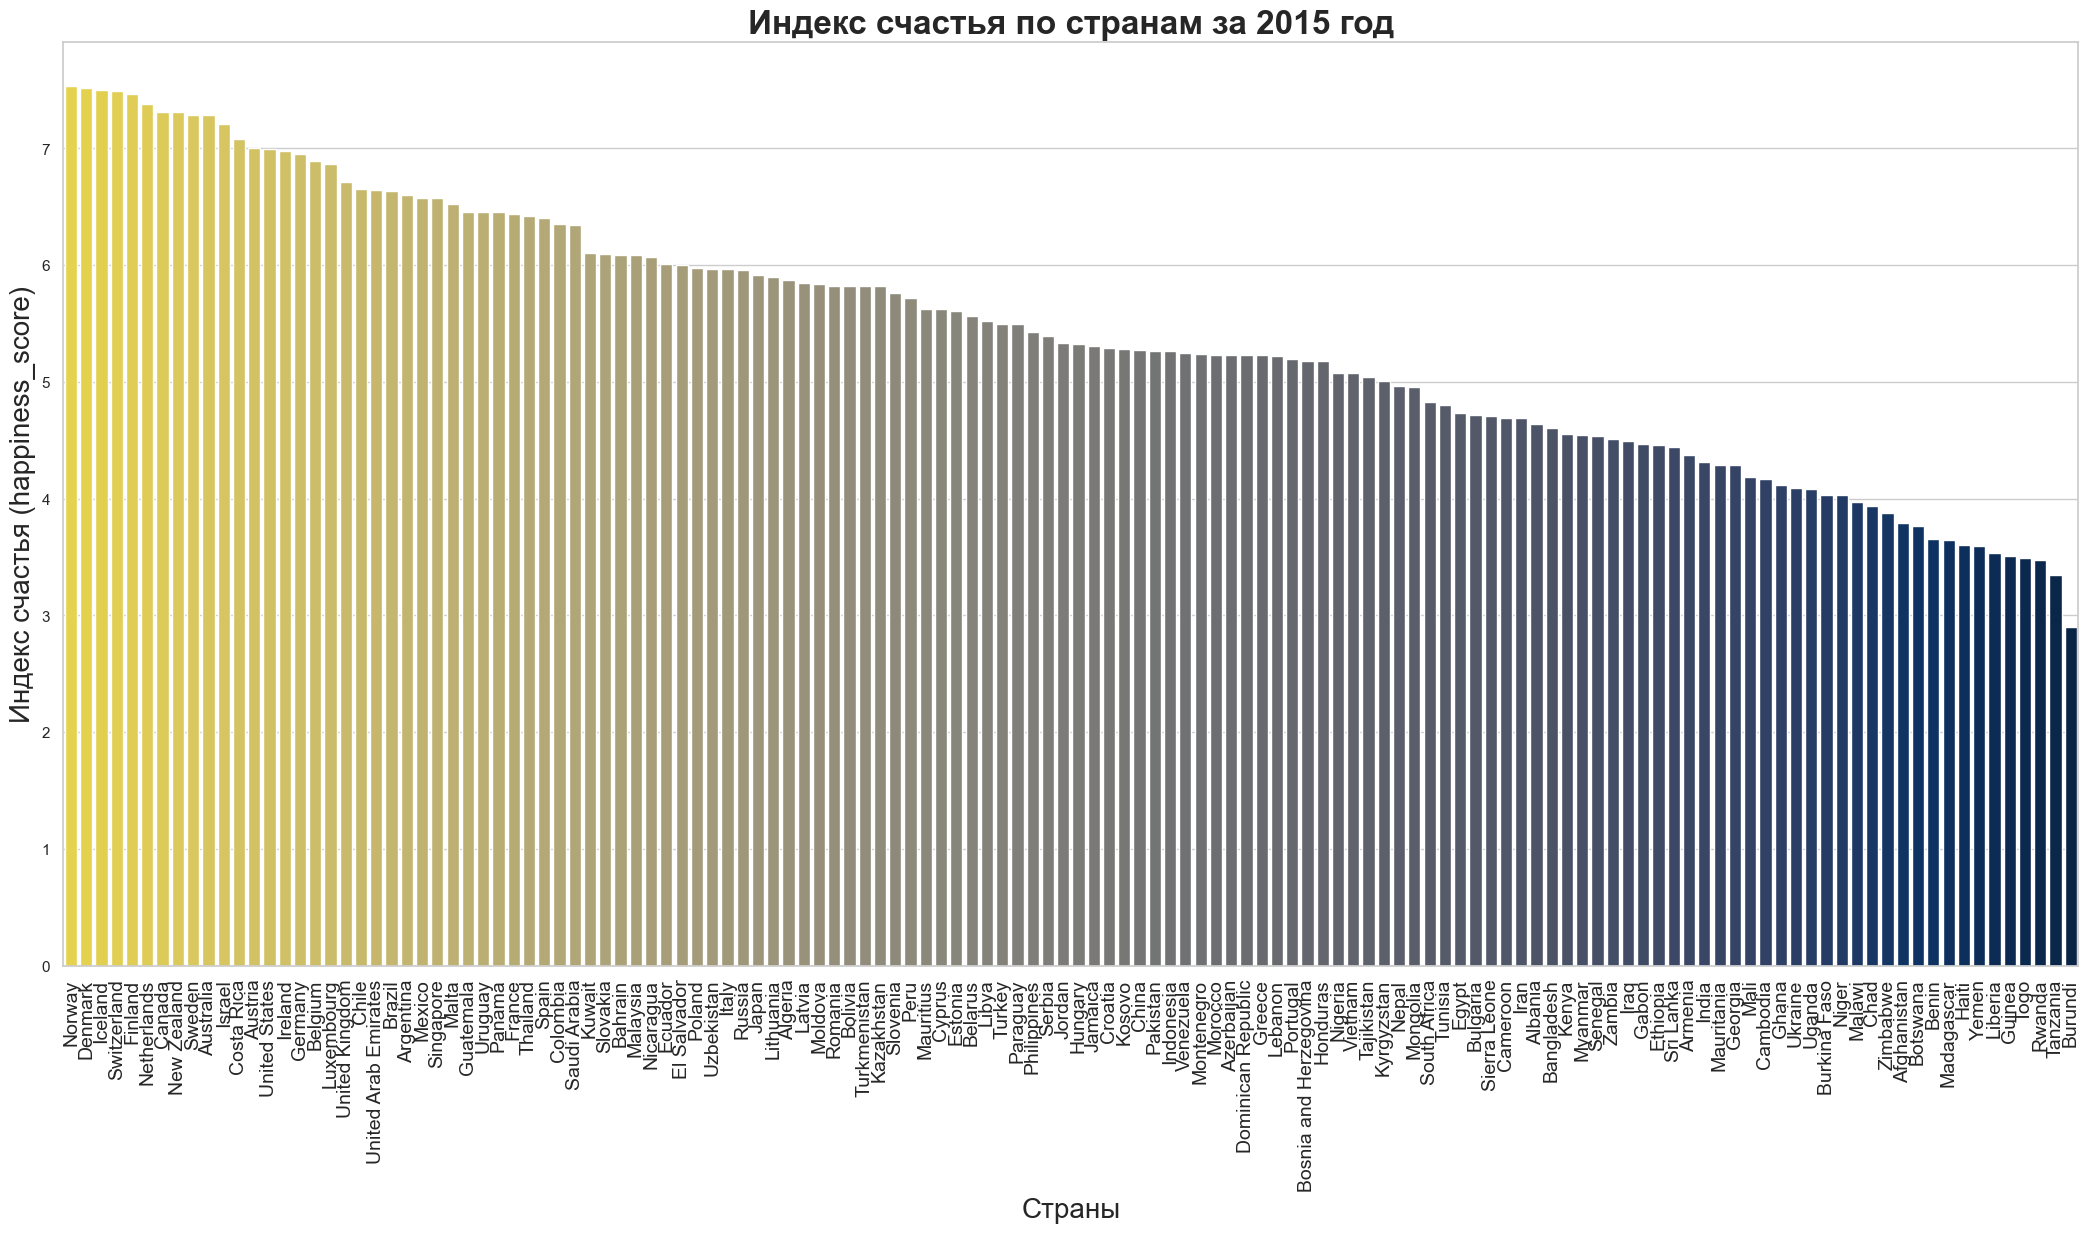

In [553]:
sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize=(26,12))
sns.barplot(data=df2015,x=df2015["Country"], y="happiness_score",palette=("cividis_r"))
plt.xlabel("Страны", fontsize = 20)
plt.ylabel("Индекс счастья (happiness_score)", fontsize = 20)
plt.title("Индекс счастья по странам за 2015 год", fontsize = 24, fontweight = 'bold')
plt.xticks(rotation=90, fontsize = 10) 
plt.xticks(fontsize = 14)  
plt.show()

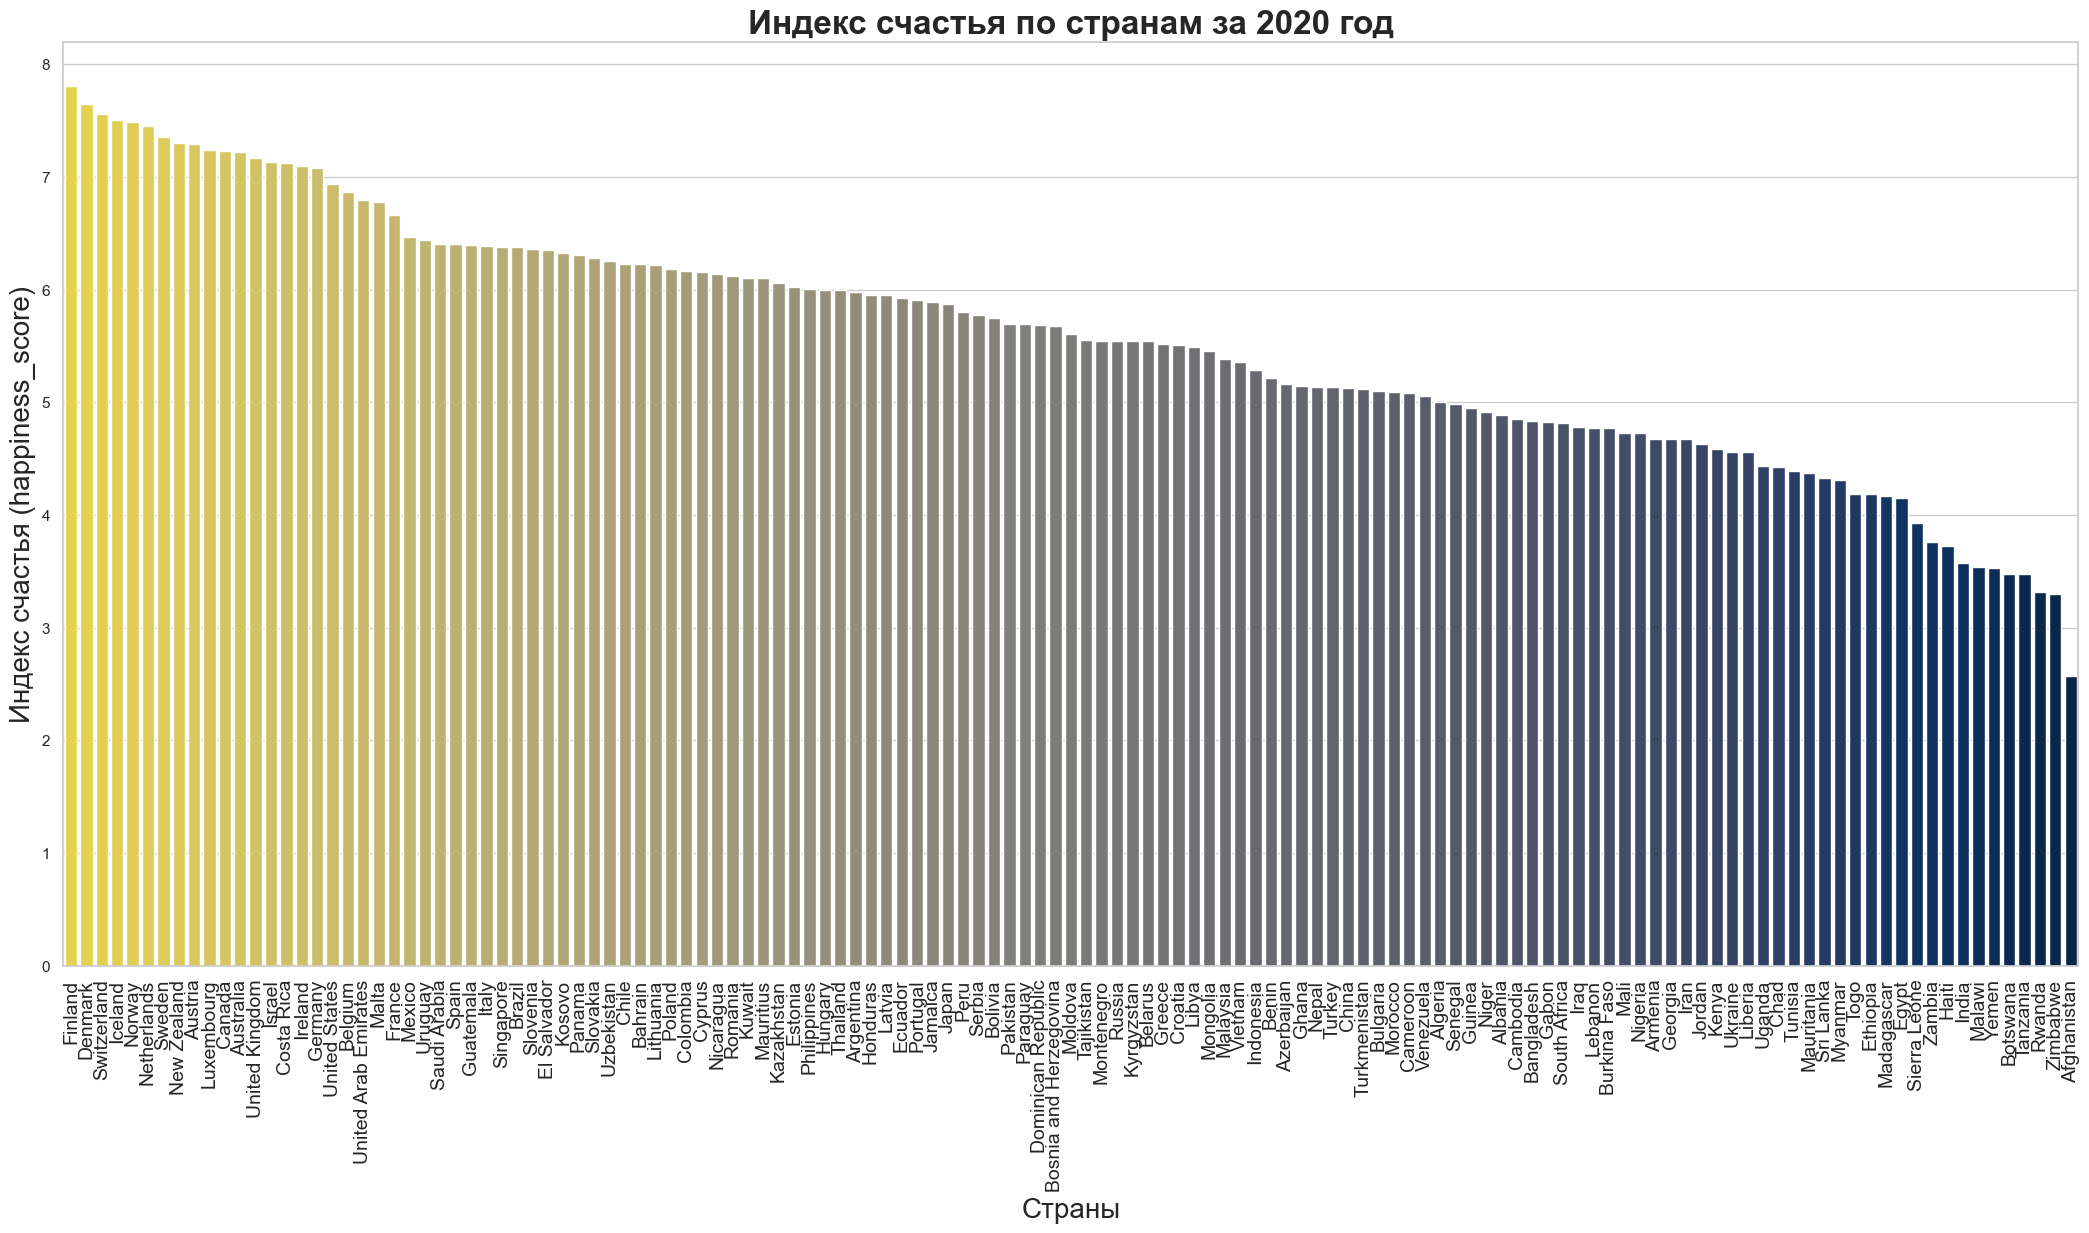

In [554]:
sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize=(26,12))
sns.barplot(data=df2020,x=df2020["Country"], y="happiness_score", palette=("cividis_r"))

plt.xlabel("Страны", fontsize = 20)
plt.ylabel("Индекс счастья (happiness_score)", fontsize = 20)
plt.title("Индекс счастья по странам за 2020 год", fontsize = 24, fontweight = 'bold')
plt.xticks(rotation=90, fontsize = 10) 
plt.xticks(fontsize = 14)  
plt.show()

Как можно заметить, самыми "счастиливыми" странами являются страны Северной Европы, а также Швейцария и Новая Зеландия, а самыми "несчастливыми" страны Африки и Азии. В этой связи интересно посмотреть на взаимосвязь индекса счастья с уровнем ВВП на душу населения.

Подсчитаем средний индекс счастья во всех странах за 2015 и 2020 годы. Тем самым, попробуем ответить на наш третий исследовательский вопрос и подтвердить или опровергнуть третью гипотезу, согласно которой, в среднем уровень счастья в 2015 году был выше, чем в 2020 году.

In [555]:
df.happiness_score.mean() # усредненный индекс счастья по всем годам

5.475456508927939

In [556]:
df2015.happiness_score.mean() # усредненный индекс счастья за 2015 год

5.437484844174243

In [557]:
df2020.happiness_score.mean() # усредненный индекс счастья за 2020 год

5.573504573519084

In [558]:
5.437484844174243 - 5.573504573519084

-0.13601972934484063

Можно заметить, что в 2020 году средний индекс счастья больше на 0.136 в сравнении с 2015 годом. Чтобы проверить эту разницу на статистическую значимость, проведем t-test, взяв в качестве H0: средний индекс счастья в 2015 году равен среднему индексу счастья в 2020 году, а за H1: усредненные индексы счастья за 2015 и 2020 годы отличаются.

In [559]:
st.ttest_ind(df2015['happiness_score'], df2020['happiness_score'],equal_var=False)

Ttest_indResult(statistic=-0.9907307791717908, pvalue=0.322734753768361)

Однако, если провести t-test о равенстве средних по двум годам, то можно сказать, что разница в средних не является статистически значимой, поскольку p-value > 0.05 и даже больше 0.1, следовательно, мы не можем отклонить нулевую гипотезу о наличии равенства среднего индекса счастья по двум годам. А значит, наша третья гипотеза не подтвердилась, ведь в 2020 году средний индекс счастья оказался даже выше, чем в 2015, однако разница является несущественной. Поэтому можно говорить, что в среднем уровень счастья в 2015 году равен уровню счастья в 2020 году.

Теперь посмотрим на изменение индекса счастья за все представленные в датафрейме года

In [560]:
happiness_score_by_year = df.groupby('Year', as_index = False).agg({'happiness_score': 'mean'}).round(3)

In [561]:
happiness_score_by_year

,Year,happiness_score
0,2015,5.437
1,2016,5.440
2,2017,5.507
3,2018,5.465
4,2019,5.431
5,2020,5.574


C:\Users\aksen\AppData\Local\Temp\ipykernel_18080\1096395027.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle = '-.',


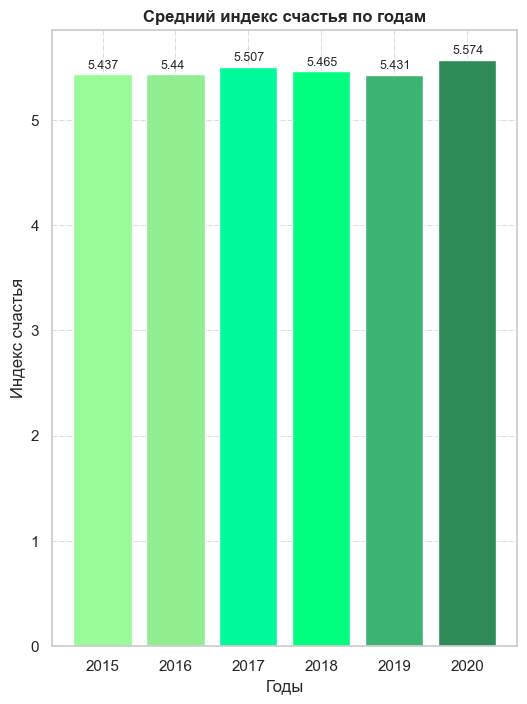

In [562]:
fig, ax = plt.subplots(figsize =(6, 8)) 
pl = ax.bar(happiness_score_by_year['Year'], happiness_score_by_year['happiness_score'],
       color = ["#98FB98", "#90EE90", '#00FA9A', '#00FF7F', '#3CB371', '#2E8B57'])
for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.2, bar.get_height()+0.05), 
                     fontsize=9)

ax.set_title("Средний индекс счастья по годам", fontsize = 12, fontweight = 'bold')
ax.set_ylabel("Индекс счастья")
ax.set_xlabel("Годы")
ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

Как можно заметить, среднее значение индекса счастья за 2020 год чуточку больше, чем за все остальные годы, однако эта разница незначительна, то есть все столбцы примерно равны.

## Взаимосвязь между индексом счастья и другими показателями

Вернемся к анализу изначального датафрейма. Для начала визуализируем две основные независимые переменные (cpi_score и gdp_per_capita), которые понадобятся нам при построении линейной регрессии.

Можно визуализировать распределение индекса восприятия коррупции по странам за все года.

In [563]:
df_sorted_by_cpi = df.sort_values('cpi_score', ascending = False)

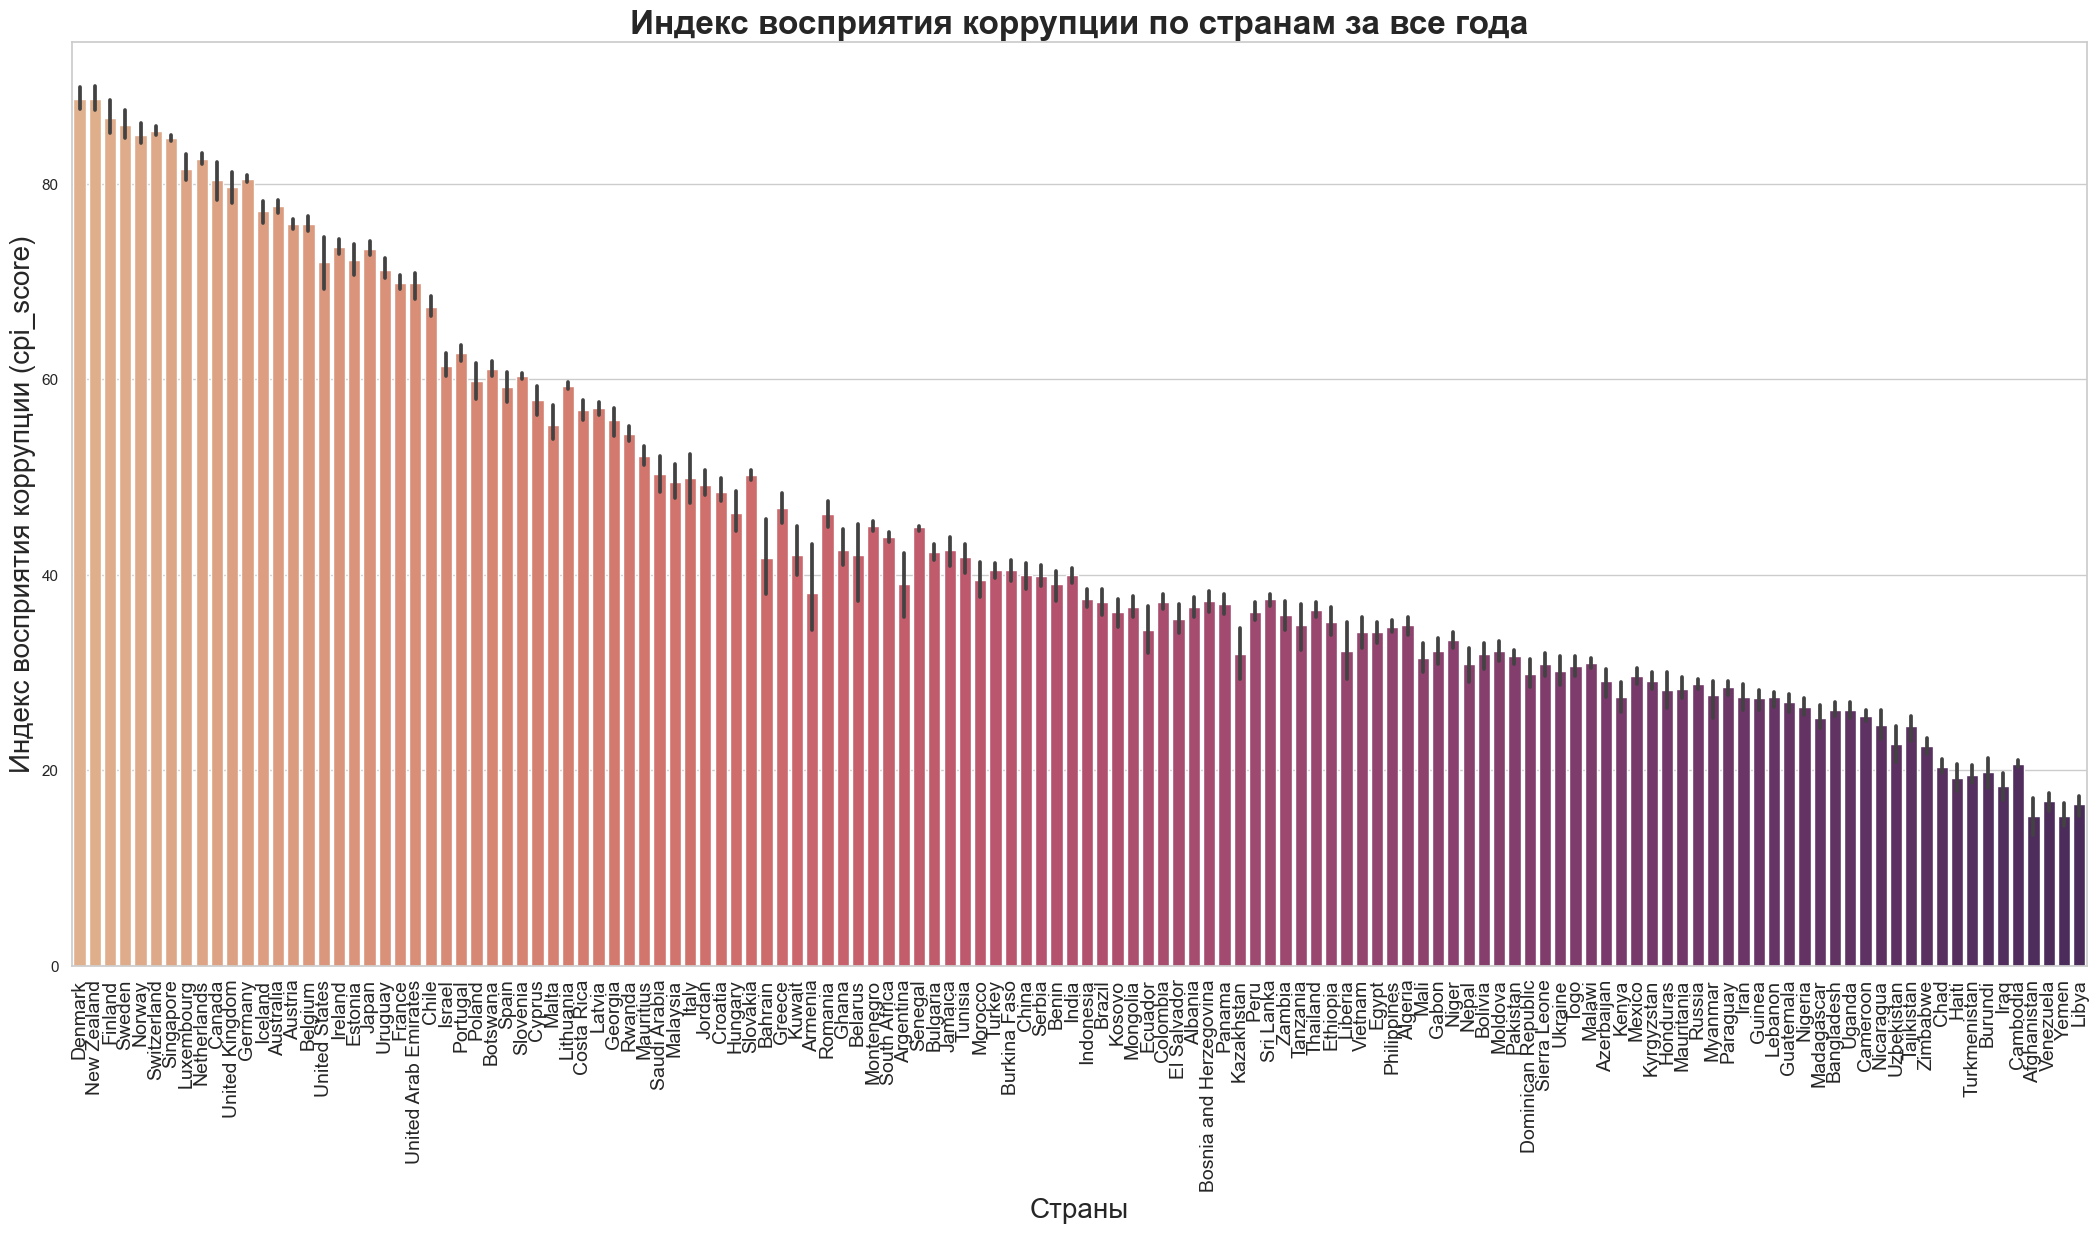

In [564]:
sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize=(26,12))
sns.barplot(data=df_sorted_by_cpi,x=df_sorted_by_cpi["Country"], y="cpi_score",palette=("flare"))
plt.xlabel("Страны", fontsize = 20)
plt.ylabel("Индекс восприятия коррупции (cpi_score)", fontsize = 20)
plt.title("Индекс восприятия коррупции по странам за все года", fontsize = 24, fontweight = 'bold')
plt.xticks(rotation=90, fontsize = 10) 
plt.xticks(fontsize = 14)  
plt.show()

Наибольшие значения индекса восприятия коррупции принадлежат Дании, Новой Зелендии и Финляндии, которые стабильно держат топ-3 рейтинга, то есть в этих странах, согласно этому индексу, меньше всего коррупции.

In [565]:
df['gdp_per_capita'].describe()

count    791.000000
mean       0.930392
std        0.384598
min        0.015300
25%        0.645446
50%        0.995539
75%        1.228785
max        2.096000
Name: gdp_per_capita, dtype: float64

Если взглянуть на описательную статистику по переменной ВВП на душу населения, то можно отметить, что ее среднее значение равняется 0.930392, а медианное равняется 0.995539, то есть распределение будет немного скошено влево. Минимальное значение равно 0.015300, а максимальное 2.096000

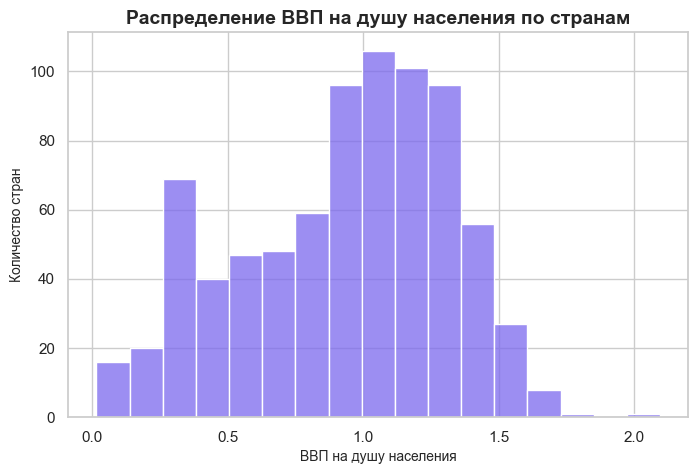

In [566]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['gdp_per_capita'], color = '#7B68EE')
plt.xlabel("ВВП на душу населения", fontsize = 10)
plt.ylabel("Количество стран", fontsize = 10)
plt.title("Распределение ВВП на душу населения по странам", fontsize = 14, fontweight = 'bold');

In [567]:
df[df['gdp_per_capita'] == df['gdp_per_capita'].max()]

,Country,happiness_score,gdp_per_capita,health,freedom,generosity,continent,Year,cpi_score
415,United Arab Emirates,6.774,2.096,0.67,0.284,0.186,Asia,2018,70


Максимальный ВВП на душу населения соответствует ОАЭ за 2018 год.

In [568]:
df[df['gdp_per_capita'] == df['gdp_per_capita'].min()]

,Country,happiness_score,gdp_per_capita,health,freedom,generosity,continent,Year,cpi_score
262,Burundi,2.905,0.0153,0.22396,0.1185,0.19727,Africa,2016,20


Минимальный ВВП на душу населения соответствует Бурунди за 2016 год.

Теперь визуализируем ВВП на душу населения по странам за все года.

In [569]:
df_sorted_by_gdp = df.sort_values('gdp_per_capita', ascending = False)

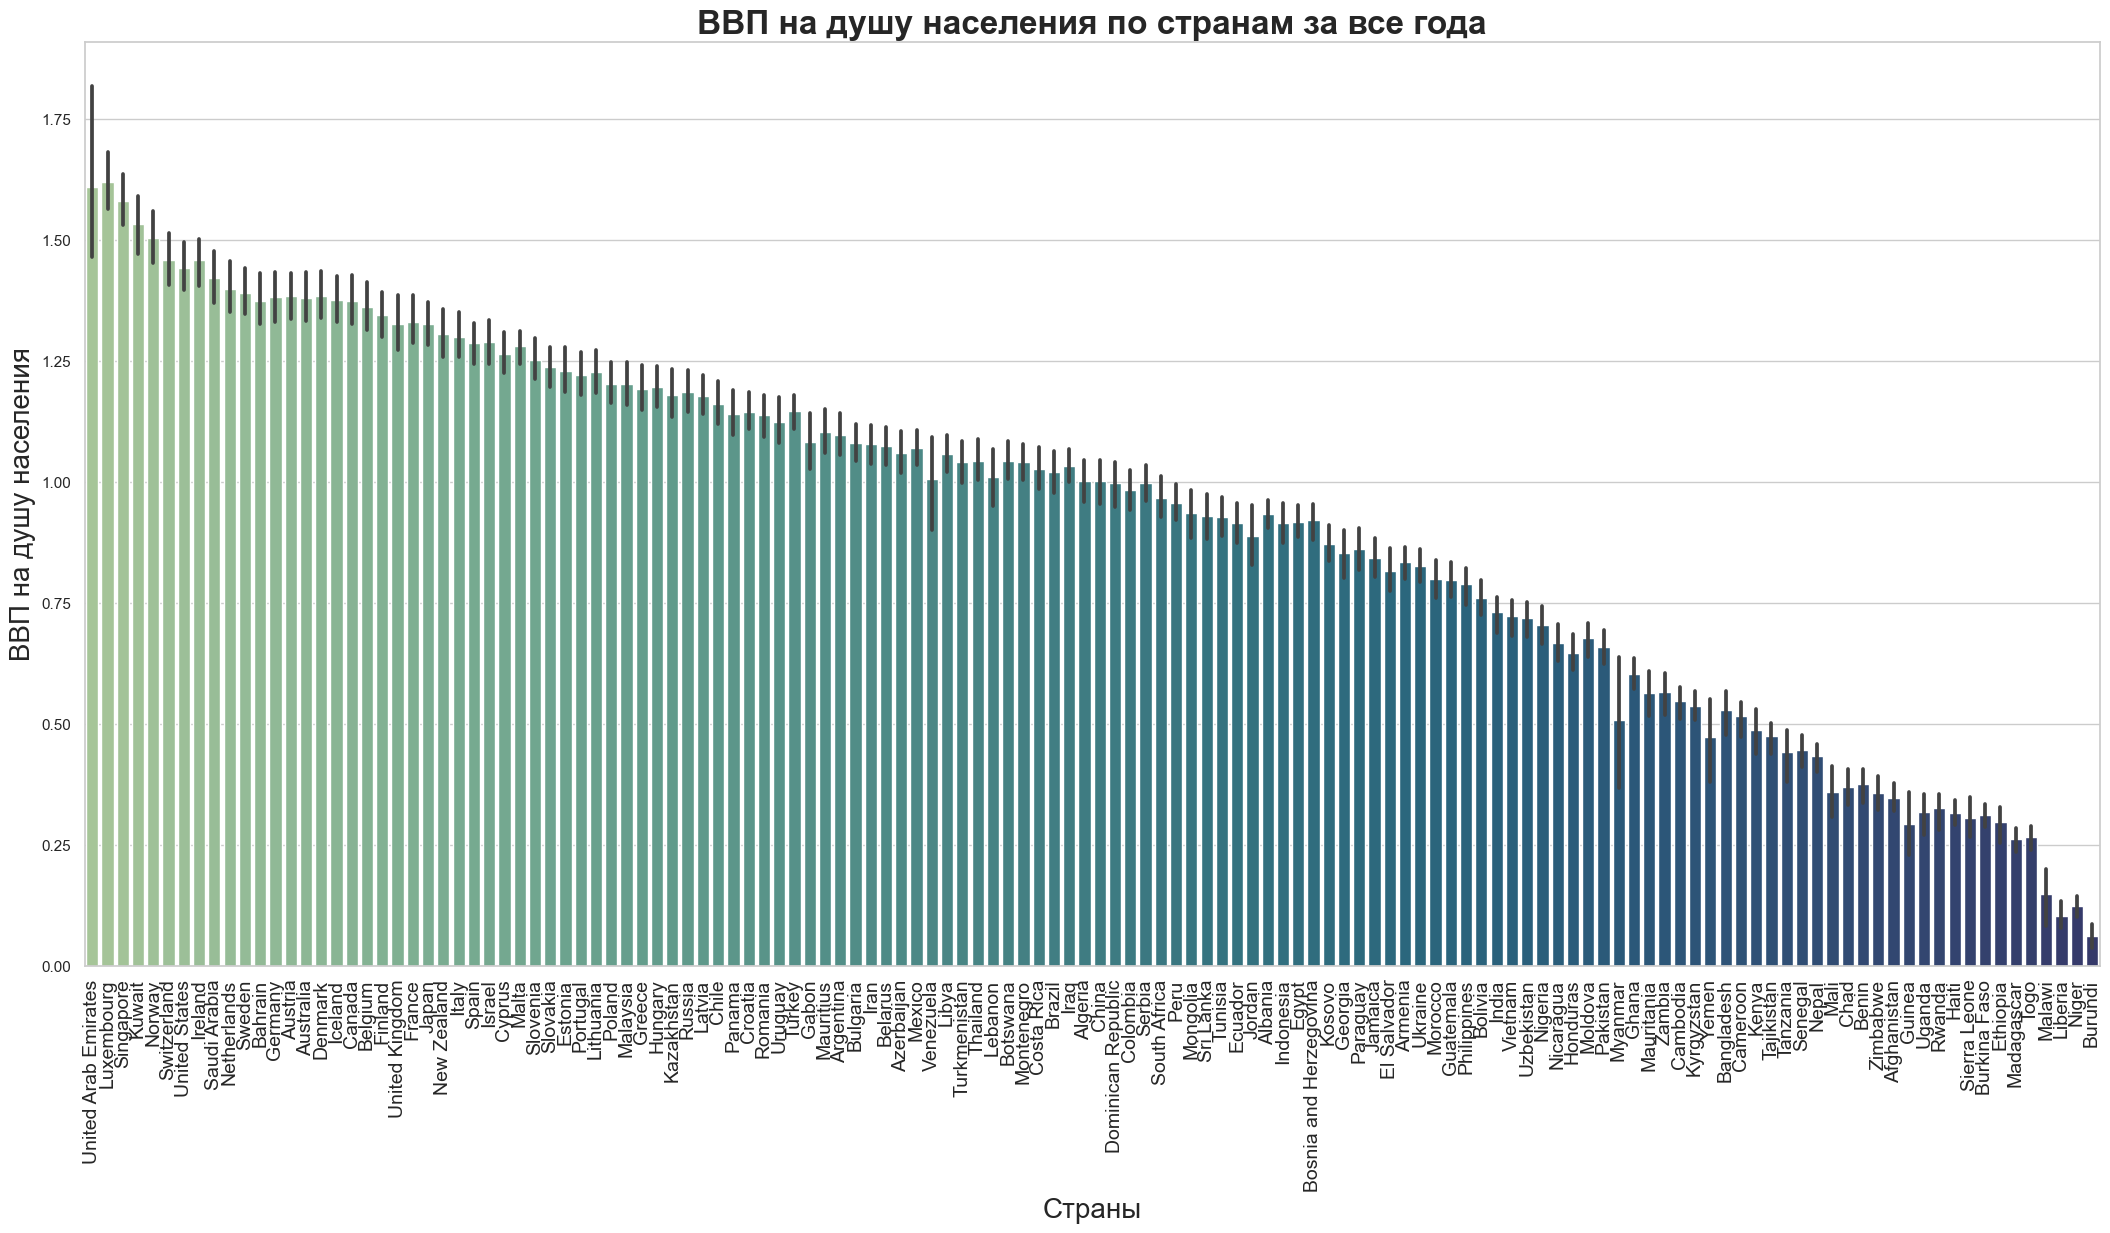

In [570]:
sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize=(26,12))
sns.barplot(data=df_sorted_by_gdp,x=df_sorted_by_gdp["Country"], y="gdp_per_capita",palette=("crest"))
plt.xlabel("Страны", fontsize = 20)
plt.ylabel("ВВП на душу населения", fontsize = 20)
plt.title("ВВП на душу населения по странам за все года", fontsize = 24, fontweight = 'bold')
plt.xticks(rotation=90, fontsize = 10) 
plt.xticks(fontsize = 14)  
plt.show()

Странами, имеющими самую высокую cтепень, в которой ВВП на душу населения способствует расчету показателя счастья стали ОАЭ, Люксембург и Сингапур, а наименьшее значение получили Либерия, Нигер и Бурунди.

Теперь построим матрицу корреляций и на ее основе тепловую карту, чтобы понимать, какие переменные хорошо коррелируют между собой и главное - насколько хорошо они коррелируют с индексом счастья.

In [571]:
df.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'health', 'freedom',
       'generosity', 'continent', 'Year', 'cpi_score'],
      dtype='object')

In [572]:
correlation = df[['happiness_score', 'gdp_per_capita', 'health', 'freedom',
       'generosity', 'cpi_score']].corr()
correlation

,happiness_score,gdp_per_capita,health,freedom,generosity,cpi_score
happiness_score,1.000000,0.792721,0.752816,0.543472,0.155254,0.692258
gdp_per_capita,0.792721,1.000000,0.774320,0.338606,-0.019053,0.703863
health,0.752816,0.774320,1.000000,0.380707,-0.029322,0.643607
freedom,0.543472,0.338606,0.380707,1.000000,0.306184,0.482074
generosity,0.155254,-0.019053,-0.029322,0.306184,1.000000,0.165815
cpi_score,0.692258,0.703863,0.643607,0.482074,0.165815,1.000000


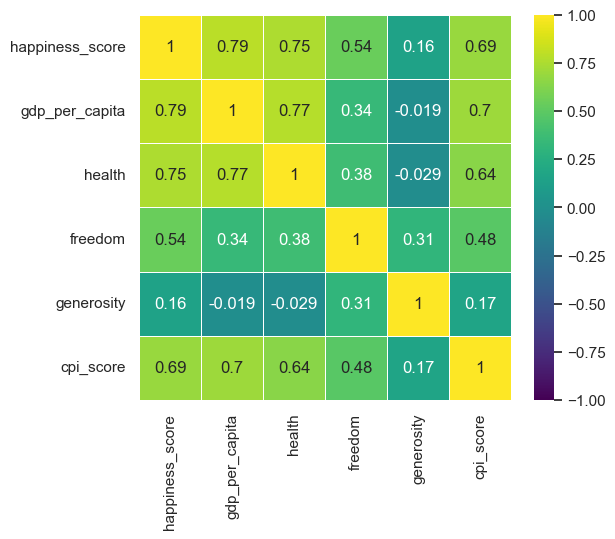

In [574]:
fig , ax = plt.subplots(figsize = (6,5))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12}, vmax = 1, vmin = -1);

В первую очередь, нас интересует с какими индексами happiness_score имеет хорошую взаимосвязь. Первое, что бросается в глаза, это то, что корреляция индекса счастья с уровнем ВВП на душу населения имеет неплохое значение и равна 0.79. Связь прямая, умеренно сильная. Также неплохое значение коэффициента корреляции с happiness_score имеет health, его значение равно 0.75, связь прямая, а сила связи так же может быть охарактеризована как умеренно сильная. Кроме того, довольно высокая корреляция индекса счастья с индексом коррупции (cpi_score), она равна 0.69, направление связи прямое. Умеренный коэффицент корреляции присутствует у happiness_score и freedom, он равен 0.54, прямое направление связи. То есть со всеми переменными, кроме generosity, индекс счастья хорошо коррелирует.

Также умеренно сильная корреляция присутствует между переменными gdp_per_capita и health, она равна 0.77, а также между gdp_per_capita и cpi_score, она равна 0.7.

Теперь перейдем к построению линейной регрессии.

Для начала я построю простую парную линейную регрессию, где в качестве зависимой переменной возьму happiness_score, а в качестве независимой - cpi_score.

Уравнение базовой модели:

happiness_score = b0 + b1 * cpi_score + εi

In [575]:
model = ols("happiness_score ~ cpi_score", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     726.0
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          6.80e-114
Time:                        12:51:28   Log-Likelihood:                -956.18
No. Observations:                 791   AIC:                             1916.
Df Residuals:                     789   BIC:                             1926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7057      0.072     51.657      0.0

Уравнение полученной модели:

happiness_score = 3.7057 + 0.0399 * cpi_score

Все коэффициенты обладают статистической значимостью, так как p-value близко к нулю.

Коэффициент при cpi_score означает, что при увеличении cpi_score на единицу, значение happiness_score будет увеличиваться на 0.0399, при прочих равных условиях.

Коэффициент детерминации R^2 = 0.479, то есть наша модель объясняет примерно 48% изменчивости значений индекса счастья от значений индекса восприятия коррупции. R^2 не сильно высокий, а значит, есть другие факторы, которые могут влиять на изменение значений индекса счастья.

Вот так будет выглядеть график рассеивания значений индекса счастья и индекса восприятия коррупции:

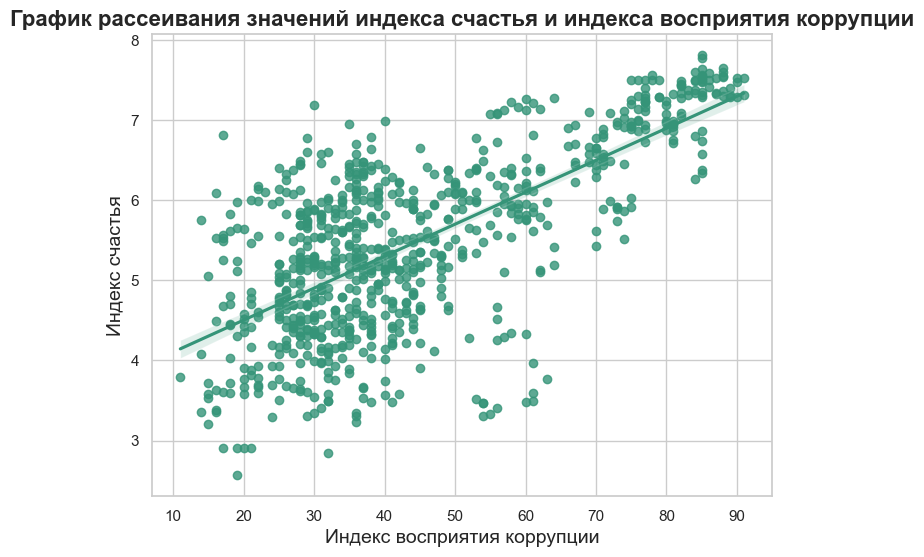

In [576]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(data = df, x = "cpi_score", y = 'happiness_score', order = 1, color = '#359478')
ax.set_title("График рассеивания значений индекса счастья и индекса восприятия коррупции", fontsize = 16, fontweight = 'bold')
ax.set_xlabel("Индекс восприятия коррупции", fontsize = 14)
ax.set_ylabel("Индекс счастья", fontsize = 14);

In [577]:
# Если попробовать с помощью полученной модели предсказать индекс счастья, если cpi_score = 50, то индекс счастья будет равен:
model.predict(exog = {"cpi_score": 50})

0    5.700503
dtype: float64

Теперь попробуем в нашу модель добавить контрольные переменные.

Уравнение модели с контрольными переменными:

happiness_score = b0 + b1 * cpi_score + b2 * gdp_per_capita + b3 * health + b4 * freedom + b5 * generosity + εi

In [578]:
model1 = ols("happiness_score ~ cpi_score + gdp_per_capita + health + freedom + generosity", df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     476.4
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          6.66e-235
Time:                        12:51:55   Log-Likelihood:                -662.56
No. Observations:                 791   AIC:                             1337.
Df Residuals:                     785   BIC:                             1365.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.2954      0.076     30.

Уравнение полученной модели:

happiness_score = 2.2954 + 0.0043 * cpi_score + 1.3461 * gdp_per_capita + 1.29 * health + 1.6878 * freedom + 0.8445 * generosity 

Как можно заметить, все коэффициенты в новой модели являются статистически значимыми.

Однако коэффициент при cpi_score уменьшился почти в 10 раз и теперь равен 0.0043, то есть при увеличении cpi_score на единицу, значение индекса счастья будет увеличиваться на 0.0043, несмотря на небольшое изменение значений индекса счастья от значения индекса восприятия коррупции, это изменение является статистически значимым.

Что касается остальных переменных, то коэффициенты при них также положительны, следовательно, при росте той или иной переменной на единицу, значение индекса счастья будет увеличиваться на коэффициент при той или иной переменной.  Подробнее остановлюсь, пожалуй, только на ВВП на душу населения. При ней коэффициент равен 1.3461, что означает, что при росте степени, в которой ВВП способствует показателю счастья, на единицу, значение индекса счастья увеличивается на 1.3461. При условии, что у нас размах gdp_per_capita равен примерно двум, то это довольно значительный рост. Собственно, эта взаимосвязь прослеживается и на матрице корреляций, что чем больше ВВП на душу населения, тем выше уровень счастья в стране.

Коэффициент детерминации R^2 подрос и теперь равен 0.752, а скорректированный R^2 = 0.751, то есть теперь наша модель объясняет примерно 75% всех изменений значений индекса счастья от изменения независимых переменных. А значит, можно сделать вывод, что эта модель лучше объясняет эти изменения, чем первая базовая модель.

## Выводы

Таким образом, у меня получилось ответить на все заявленные вопросы. Так, первый вопрос касался того, что уровень счастья выше в тех странах, в которых более низкий уровень коррупции. Так и получилось. В модели без контрольных переменных коэффициент при индексе восприятия коррупции равняется 0.0399 и является статистически значимым даже на 1% уровне значимости, то есть при прочих равных условиях, с ростом значения индекса восприятия коррупции на единицу, значение индекса счастья увеличивается на 0.0399, при этом данный результат не потерял статистическую значимость при введении контрольных переменных, однако коэффициент уменьшился примерно в 10 раз и стал равен 0.0043, тем не менее это статистически значимый результат, то есть можно говорить, что с ростом значения индекса восприятия коррупции на единицу, значение индекса счастья увеличивается на 0.0043. Таким образом, подтверждается наша первая гипотеза, что более высокий индекс счастья в тех странах, в которых меньше коррупции, ведь чем выше значение индекса восприятия коррупциии, тем страна является менее коррумпированной.

Также я смог ответить на второй исследовательский вопрос о наличии взаимосвязи между ВВП на душу населения и значением индекса счастья в стране. В множественной регрессии коэффициент при gdp_per_capita равен 1.3461, то есть с увеличением степени ВВП на единицу, значение индекса счастья увеличивается на 1.3461. Результат также имеет превосходную статистическую значимость, а значит, подтвердилась моя вторая гипотеза, согласно которой уровень счастья выше в тех странах, в которых ВВП на душу населения больше.

Также я ответил на третий исследовательский вопрос, который заключался в сравнении среднего значения индекса счастья за 2015 и 2020 годы. Так, я выяснил, что в 2020 году средние значение индекса счастья чуточку больше, чем в 2015 году, но это различие не является статистически значимым, я это проверил с помощью t-test, таким образом, третья гипотеза не подтвердилась, ведь люди в 2015 году в среднем не были более счастливыми, чем в 2020 году (если смотреть на средние значение индекса счастья по всем странам).

В дополнение отмечу, что продолжительность жизни, восприятие свободы и восприятие щедрости населения также имеют положительную и статистически значимую взаимосвязь с индексом счастья. Можно сделать вывод, что счастье населения зависит не только от восприятия коррупции и экономического благосостояния, а также и от таких эфемерных вещей, как восприятие свободы и восприятие щедрости населения, а также от продолжительности жизни. При этом, значение коэффициента детерминации во множественной регрессии не идеально, а значит, есть еще множество других факторов, которые обясняют изменение значения индекса счастья в стране.